<a href="https://colab.research.google.com/github/Francisroyce/Francisroyce/blob/main/dog_and_cat_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !unzip 'drive/MyDrive/cat and dog vision/archive.zip' -d 'drive/MyDrive/cat and dog vision'
     

Get our workspace ready

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [3]:
print('GPU', 'available (YESSSS!!!!!!)' if tf.config.list_physical_devices('GPU') else 'not available : ()')
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

GPU available (YESSSS!!!!!!)


1

In [4]:
import os
cat_folder = 'drive/MyDrive/cat and dog vision/training_set/training_set/cats'
dog_folder = 'drive/MyDrive/cat and dog vision/training_set/training_set/dogs'

dog_count = len(os.listdir(dog_folder))
cat_count = len (os.listdir(cat_folder))
print('Number of dogs:', dog_count)
print('Number of cats:', cat_count)

Number of dogs: 3992
Number of cats: 3987


In [5]:
if dog_count == len(set(os.listdir(dog_folder))):
    print('All dog files have unique identities')
else:
    print('There are duplicate identities in the dog folder')

# Checking for unique identity in the cat folder
if cat_count == len(set(os.listdir(cat_folder))):
    print('All cat files have unique identities')
else:
    print('There are duplicate identities in the cat folder')

All dog files have unique identities
All cat files have unique identities


In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [7]:
import os
from tabulate import tabulate

# File paths
filepath_cats = '/content/drive/MyDrive/cat and dog vision/training_set/training_set/cats'
filepath_dogs = '/content/drive/MyDrive/cat and dog vision/training_set/training_set/dogs'

# Get the list of files in the cat and dog folders
cat_files = os.listdir(os.path.join(filepath_cats))
dog_files = os.listdir(os.path.join(filepath_dogs))

# Count the number of files in each folder
cat_count = len(cat_files)
dog_count = len(dog_files)

# Create a table to display the file counts
table = [["Folder", "Number of Files"],
         ["Cats", cat_count],
         ["Dogs", dog_count]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="grid"))


+----------+-------------------+
| Folder   |   Number of Files |
+==========+===================+
| Cats     |              3987 |
+----------+-------------------+
| Dogs     |              3992 |
+----------+-------------------+


In [8]:
os.listdir(os.path.join(filepath_cats))

['cat.492.jpg',
 'cat.483.jpg',
 'cat.3611.jpg',
 'cat.3804.jpg',
 'cat.3196.jpg',
 'cat.452.jpg',
 'cat.3851.jpg',
 'cat.3706.jpg',
 'cat.3596.jpg',
 'cat.570.jpg',
 'cat.3711.jpg',
 'cat.333.jpg',
 'cat.3239.jpg',
 'cat.357.jpg',
 'cat.3704.jpg',
 'cat.3595.jpg',
 'cat.606.jpg',
 'cat.3839.jpg',
 'cat.611.jpg',
 'cat.3410.jpg',
 'cat.3726.jpg',
 'cat.3418.jpg',
 'cat.3718.jpg',
 'cat.3412.jpg',
 'cat.3634.jpg',
 'cat.3751.jpg',
 'cat.619.jpg',
 'cat.3824.jpg',
 'cat.3286.jpg',
 'cat.3218.jpg',
 'cat.352.jpg',
 'cat.3700.jpg',
 'cat.3383.jpg',
 'cat.3669.jpg',
 'cat.508.jpg',
 'cat.3248.jpg',
 'cat.3588.jpg',
 'cat.3975.jpg',
 'cat.543.jpg',
 'cat.3560.jpg',
 'cat.395.jpg',
 'cat.3461.jpg',
 'cat.562.jpg',
 'cat.3550.jpg',
 'cat.3657.jpg',
 'cat.3285.jpg',
 'cat.3807.jpg',
 'cat.3877.jpg',
 'cat.3529.jpg',
 'cat.3667.jpg',
 'cat.3539.jpg',
 'cat.3536.jpg',
 'cat.3440.jpg',
 'cat.565.jpg',
 'cat.3953.jpg',
 'cat.3633.jpg',
 'cat.3361.jpg',
 'cat.399.jpg',
 'cat.3886.jpg',
 'cat.584.jpg

In [9]:
os.listdir(os.path.join(filepath_dogs))

['dog.530.jpg',
 'dog.3980.jpg',
 'dog.3599.jpg',
 'dog.592.jpg',
 'dog.3913.jpg',
 'dog.359.jpg',
 'dog.346.jpg',
 'dog.3910.jpg',
 'dog.544.jpg',
 'dog.3529.jpg',
 'dog.3452.jpg',
 'dog.581.jpg',
 'dog.339.jpg',
 'dog.3874.jpg',
 'dog.3713.jpg',
 'dog.3347.jpg',
 'dog.47.jpg',
 'dog.3361.jpg',
 'dog.3724.jpg',
 'dog.3387.jpg',
 'dog.542.jpg',
 'dog.3902.jpg',
 'dog.3740.jpg',
 'dog.3623.jpg',
 'dog.353.jpg',
 'dog.3736.jpg',
 'dog.428.jpg',
 'dog.3377.jpg',
 'dog.3813.jpg',
 'dog.596.jpg',
 'dog.3478.jpg',
 'dog.3810.jpg',
 'dog.3814.jpg',
 'dog.3370.jpg',
 'dog.399.jpg',
 'dog.3426.jpg',
 'dog.583.jpg',
 'dog.456.jpg',
 'dog.3485.jpg',
 'dog.425.jpg',
 'dog.523.jpg',
 'dog.3641.jpg',
 'dog.3556.jpg',
 'dog.3996.jpg',
 'dog.452.jpg',
 'dog.504.jpg',
 'dog.420.jpg',
 'dog.3549.jpg',
 'dog.3936.jpg',
 'dog.412.jpg',
 'dog.560.jpg',
 'dog.458.jpg',
 'dog.3513.jpg',
 'dog.3415.jpg',
 'dog.343.jpg',
 'dog.3826.jpg',
 'dog.3409.jpg',
 'dog.418.jpg',
 'dog.513.jpg',
 'dog.3891.jpg',
 'dog.3

In [10]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/cat and dog vision/training_set/training_set/cats/cat.642.jpg'))
img2 = cv2.imread(os.path.join('/content/drive/MyDrive/cat and dog vision/training_set/training_set/cats/dog.2478.jpg'))


In [11]:
img.shape

(318, 499, 3)

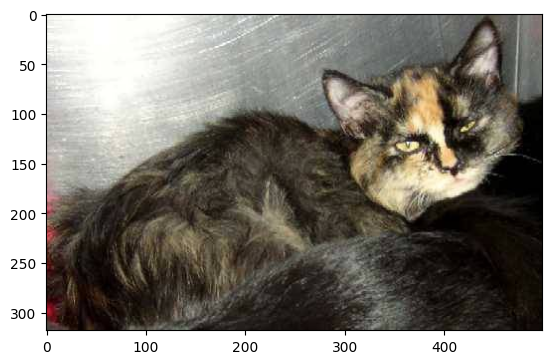

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

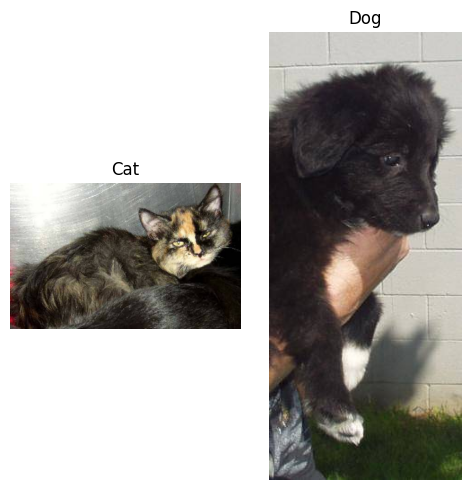

In [13]:
import cv2
import matplotlib.pyplot as plt

# Read the images
img = cv2.imread(os.path.join('/content/drive/MyDrive/cat and dog vision/training_set/training_set/cats/cat.642.jpg'))
img2 = cv2.imread(os.path.join('/content/drive/MyDrive/cat and dog vision/training_set/training_set/dogs/dog.2478.jpg'))

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Create subplots and display the images
fig, axes = plt.subplots(1, 2, figsize=(5, 5))
axes[0].imshow(img_rgb)
axes[0].set_title("Cat")
axes[1].imshow(img2_rgb)
axes[1].set_title("Dog")

# Remove axis labels
for ax in axes:
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [14]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/cat and dog vision/training_set/training_set')

Found 7977 files belonging to 2 classes.


In [15]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
data = data.map(lambda x, y: (tf.cast(x, tf.int32), y))

data_iterator = iter(data)
batch = data_iterator.next()

In [20]:
batch


(<tf.Tensor: shape=(32, 256, 256, 3), dtype=int32, numpy=
 array([[[[ 44,  21,  15],
          [ 41,  18,  12],
          [ 42,  19,  13],
          ...,
          [ 45,  30,  25],
          [ 38,  24,  21],
          [ 44,  30,  27]],
 
         [[ 42,  19,  13],
          [ 44,  22,  16],
          [ 46,  24,  19],
          ...,
          [ 48,  33,  30],
          [ 50,  36,  34],
          [ 52,  38,  36]],
 
         [[ 37,  14,   8],
          [ 36,  14,   9],
          [ 32,  11,   6],
          ...,
          [ 50,  35,  34],
          [ 53,  39,  39],
          [ 51,  37,  37]],
 
         ...,
 
         [[174, 146, 138],
          [158, 130, 121],
          [149, 121, 110],
          ...,
          [254, 247, 229],
          [254, 250, 233],
          [254, 252, 237]],
 
         [[180, 151, 142],
          [181, 152, 142],
          [176, 145, 134],
          ...,
          [252, 246, 228],
          [253, 248, 233],
          [253, 251, 238]],
 
         [[140, 110, 100],

In [21]:
batch[0].shape

TensorShape([32, 256, 256, 3])

In [26]:
# lebaels
batch[1]

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int32)>

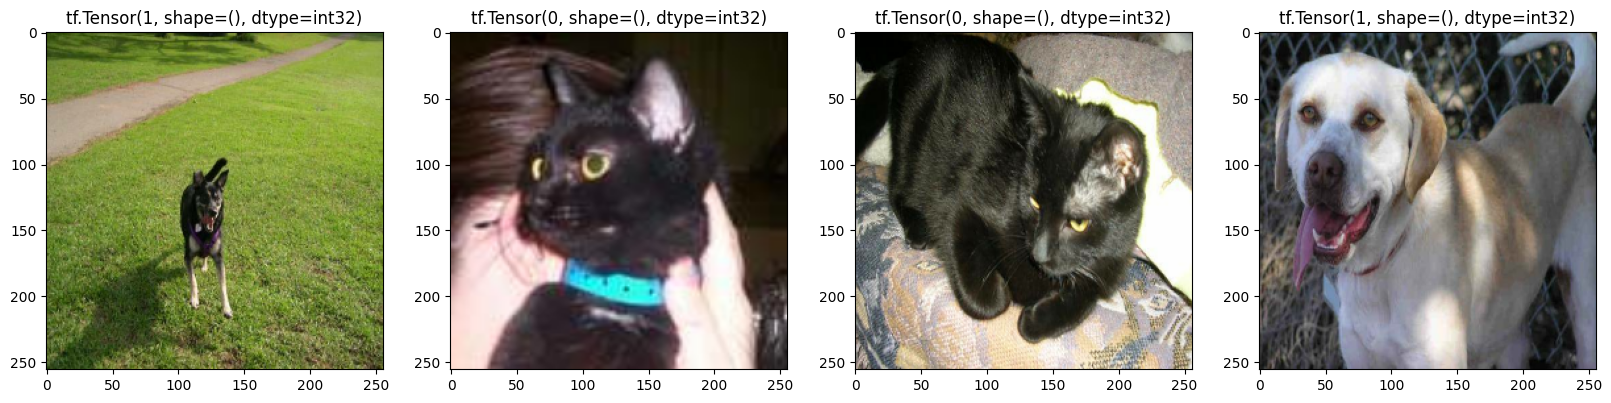

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    img = tf.cast(img, tf.int32)
    ax[idx].imshow(img)
    ax[idx].set_title(str(batch[1][idx]))  # Convert label to string
# from here, class 1 = dogs and class 0 = cats

# Preprocessing

In [30]:
batch[0]

<tf.Tensor: shape=(32, 256, 256, 3), dtype=int32, numpy=
array([[[[ 28,  53,   1],
         [ 48,  73,  17],
         [ 58,  83,  26],
         ...,
         [ 67,  93,  46],
         [ 67,  93,  45],
         [ 64,  90,  42]],

        [[ 38,  63,   8],
         [ 52,  77,  20],
         [ 55,  80,  22],
         ...,
         [ 67,  93,  47],
         [ 66,  92,  44],
         [ 65,  91,  43]],

        [[ 44,  69,  10],
         [ 55,  81,  20],
         [ 57,  83,  21],
         ...,
         [ 62,  88,  43],
         [ 61,  86,  40],
         [ 61,  87,  39]],

        ...,

        [[ 58,  87,  33],
         [ 69,  96,  43],
         [ 66,  88,  39],
         ...,
         [ 57,  56,  10],
         [102, 106,  49],
         [ 87,  97,  37]],

        [[ 50,  78,  27],
         [ 48,  75,  24],
         [ 44,  66,  19],
         ...,
         [ 58,  56,  12],
         [ 89,  93,  37],
         [121, 132,  65]],

        [[ 38,  66,  16],
         [ 29,  56,   7],
         [ 33,  5

In [31]:
batch[1]

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)>

In [35]:
minimum_value = tf.reduce_min(batch[0])
maximum_value = tf.reduce_max(batch[0])

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)


Minimum value: tf.Tensor(0, shape=(), dtype=int32)
Maximum value: tf.Tensor(255, shape=(), dtype=int32)


In [38]:
batch[0].shape, batch[1].shape

(TensorShape([32, 256, 256, 3]), TensorShape([32]))

In [40]:
scaled_batch = tf.cast(batch[0], tf.float32) / 255.0

In [41]:
minimum_value = tf.reduce_min(scaled_batch[0])
maximum_value = tf.reduce_max(scaled_batch[0])
print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)

Minimum value: tf.Tensor(0.0, shape=(), dtype=float32)
Maximum value: tf.Tensor(1.0, shape=(), dtype=float32)


In [42]:
data = data.map(lambda x, y: (tf.cast(x/255, tf.int32), y))

scaled_iterator = iter(data)
batch = scaled_iterator.next()

In [43]:
minimum_value = tf.reduce_min(batch[0])
maximum_value = tf.reduce_max(batch[0])
print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)

Minimum value: tf.Tensor(0, shape=(), dtype=int32)
Maximum value: tf.Tensor(1, shape=(), dtype=int32)


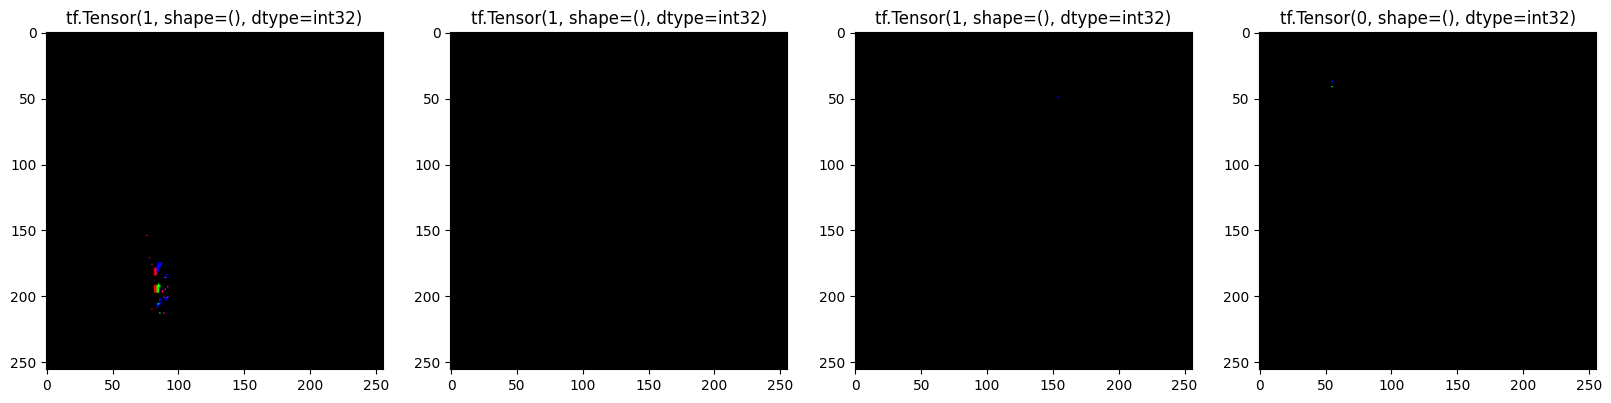